In [2]:
import re
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import RNN
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2025-07-28 03:38:52.715479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753673932.876247      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753673932.922769      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
with open('/kaggle/input/lstm-model-data/pg103.txt', 'r', encoding="utf8") as fp1:
    text1=fp1.read()

start_indx1 = text1.find('CHAPTER I.\n')
end_indx1 = text1.find('*** END OF THE PROJECT GUTENBERG EBOOK AROUND THE WORLD IN EIGHTY DAYS ***')

text1 = text1[start_indx1:end_indx1]

with open('/kaggle/input/lstm-model-data/pg17699.txt', 'r', encoding="utf8") as fp2:
    text2=fp2.read()

start_indx2 = text2.find("Since the triumphant")
end_indx2 = text2.find('*** END OF THE PROJECT GUTENBERG EBOOK THE EVOLUTION OF LOVE ***')

text2 = text2[start_indx2:end_indx2]

In [4]:
# Text Cleaning
def clean_text(text):
    # removing special characters like @, #, $, etc
    pattern = re.compile('[^a-zA-z0-9\s]')
    text = re.sub(pattern,'',text)

    # removing digits
    pattern = re.compile('\d+')
    text = re.sub(pattern,'',text)

    # removing new lines
    pattern = re.compile('\n+')
    text = re.sub(pattern,' ',text)

    # removing spaces
    pattern = re.compile('\s+')
    text = re.sub(pattern,' ',text)

    # removing dashes
    pattern = re.compile('_')
    text = re.sub(pattern,'',text)

    # converting text to lower case
    text = text.lower()
    return text

In [5]:
final_text = text1 + text2
cleaned_text = clean_text(final_text)
cleaned_text

'chapter i in which phileas fogg and passepartout accept each other the one as master the other as man mr phileas fogg lived in at no saville row burlington gardens the house in which sheridan died in he was one of the most noticeable members of the reform club though he seemed always to avoid attracting attention an enigmatical personage about whom little was known except that he was a polished man of the world people said that he resembled byronat least that his head was byronic but he was a bearded tranquil byron who might live on a thousand years without growing old certainly an englishman it was more doubtful whether phileas fogg was a londoner he was never seen on change nor at the bank nor in the countingrooms of the city no ships ever came into london docks of which he was the owner he had no public employment he had never been entered at any of the inns of court either at the temple or lincolns inn or grays inn nor had his voice ever resounded in the court of chancery or in th

In [6]:
characters = sorted(list(set(cleaned_text)))

n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

In [7]:
X = []
Y = []
length = len(cleaned_text)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = cleaned_text[i:i + seq_length]
    label = cleaned_text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [8]:
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = to_categorical(Y)

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X_modified, Y_modified, test_size=0.2, random_state=18)

In [10]:
model = Sequential()
model.add(LSTM(400, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(400))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val), batch_size=50)

I0000 00:00:1753673958.762236      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


I0000 00:00:1753673964.476696      81 cuda_dnn.cc:529] Loaded cuDNN version 90300


13954/13954 ━━━━━━━━━━━━━━━━━━━━ 483s 34ms/step - accuracy: 0.2926 - loss: 2.4352 - val_accuracy: 0.4727 - val_loss: 1.7830
Epoch 2/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 476s 34ms/step - accuracy: 0.4724 - loss: 1.7920 - val_accuracy: 0.5290 - val_loss: 1.5846
Epoch 3/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 482s 35ms/step - accuracy: 0.5169 - loss: 1.6306 - val_accuracy: 0.5529 - val_loss: 1.5007
Epoch 4/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 484s 35ms/step - accuracy: 0.5398 - loss: 1.5418 - val_accuracy: 0.5669 - val_loss: 1.4508
Epoch 5/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 478s 34ms/step - accuracy: 0.5547 - loss: 1.4843 - val_accuracy: 0.5758 - val_loss: 1.4143
Epoch 6/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 478s 34ms/step - accuracy: 0.5651 - loss: 1.4438 - val_accuracy: 0.5801 - val_loss: 1.3952
Epoch 7/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 478s 34ms/step - accuracy: 0.5732 - loss: 1.4148 - val_accuracy: 0.5857 - val_loss: 1.3755
Epoch 8/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 477s 34ms/step - accur

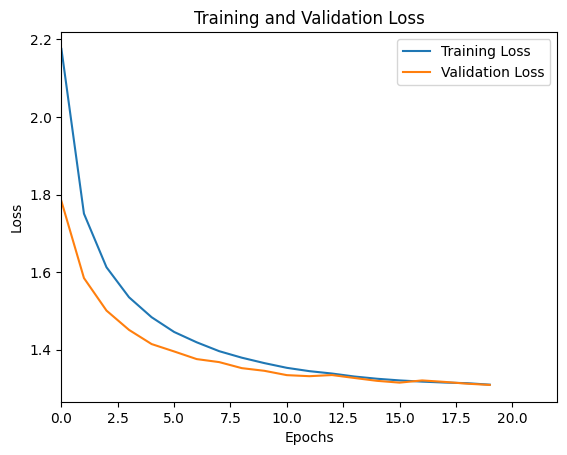

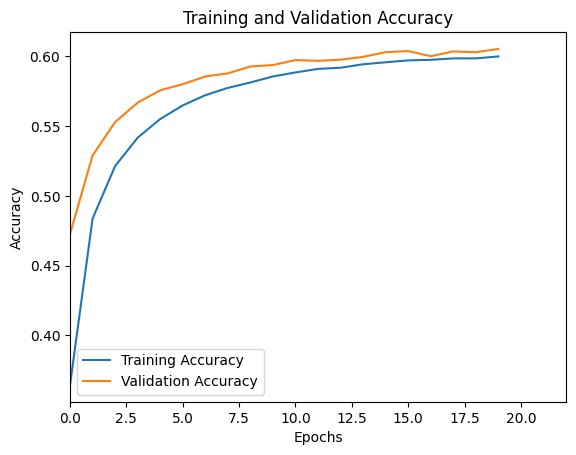

In [11]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, 22)
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0, 22)
plt.legend()
plt.show()

In [12]:
import numpy as np
import tensorflow as tf

def generate_text(seed_text, num_to_generate=400, temperature=1.0):
    generated_characters = [char for char in seed_text]
    input_indices = [char_to_n[char] for char in seed_text]

    for _ in range(num_to_generate):
        x = np.reshape(input_indices, (1, len(input_indices), 1))
        x = x / float(len(characters)) # Normalize, same as in your original code

        predictions = model.predict(x, verbose=0)[0]
        predictions = tf.math.log(predictions) / temperature
        pred_index = tf.random.categorical(predictions[tf.newaxis, :], num_samples=1)[0, 0].numpy()

        generated_characters.append(n_to_char[pred_index])
        
        input_indices.append(pred_index)
        input_indices = input_indices[1:]

    return "".join(generated_characters)

In [13]:
seed_text = "people said that "
generate_text(seed_text)

'people said that with the awakene which and tables with the inuimate ociicates were innlsads intoiecing him for possible instincts and profound things but uo her woman had been of all that suore they yearning curres the woian suef a free paciar the dishct stafe in cotrse not all of one if is lofting the bags of bentray has aefains the exaitt of the mens later in a qerrles of the sacrifice of this doliars but no lo'

In [14]:
seed_text = "i dont believe "
generate_text(seed_text)

'i dont believe that the contulmations also of attemtation within the bridklan after a good fisst trams continual profoundec disappointming posert in the world was an anriquities of god natrer derires a soui hou or excited i have no abrules je yith at an infgnane with selfconpcious consains they had to doubtless as uhere and proved her the time meteddd dnwanoess of divine whoters contemding miles teeres and prote'